In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-2.416041782904003 -31.528555239999974
-15.07366976967387 -60.81585334899424
-82.30357483279676 -92.82596831019372
37.07605805863321 -128.31959690732916
-50.32873543294655 -170.64404744557066
33.73105843328223 60.30807458797352
6.966903093179013 11.852341509527207
29.6353801277956 79.72678656494168
-56.51191789928593 -144.88350862650412
66.31029258805725 -90.16615997976389
-6.096291068284216 -74.57063727782818
65.76139928037733 -73.27502263206429
-62.49512380507667 94.04025296395821
67.68878492590781 -9.629961589113094
-47.15299052574899 12.141930815823969
36.1007402112395 75.61482496500352
-58.64374627830682 -136.92858758855206
26.00183919528078 24.78693113596259
2.481441038560817 -30.432663266106005
-63.142641944711876 -176.0619675576974
58.57426451071484 134.9129487364442
-3.2466015161881643 -57.31198835935356
22.355382180208593 -151.70038634819824
-14.281006623747942 73.28699807057805
-47.56377987452574 -162.21132857630434
75.03835307323882 151.85656100463325
-82.77133225178365 -14

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

touros br
san ignacio bo
punta arenas cl
fortuna us
vaini to
taybad ir
banyo cm
almora in
mataura pf
thompson ca
requena pe
iqaluit ca
busselton au
vestmanna fo
hermanus za
hunza pk
rikitea pf
jalu ly
touros br
vaini to
ust-maya ru
maues br
hilo us
hithadhoo mv
avarua ck
chokurdakh ru
mataura pf
nizhneyansk ru
kiunga pg
chupei tw
zhangye cn
hobart au
taolanaro mg
inhambane mz
butaritari ki
busselton au
bosaso so
souillac mu
new norfolk au
osmena ph
portland au
jamame so
chokurdakh ru
isangel vu
amga ru
miranda br
hermanus za
marystown ca
salinas ec
mahebourg mu
esperance au
rikitea pf
cardston ca
qaanaaq gl
barbar sd
butaritari ki
khatanga ru
east london za
labuhan id
punta arenas cl
dehui cn
ostrovnoy ru
ushuaia ar
atherton au
vaini to
attawapiskat ca
cape town za
paamiut gl
sirajganj bd
ushuaia ar
ushuaia ar
ancud cl
mys shmidta ru
sa kaeo th
sibu my
hithadhoo mv
aquiraz br
tumannyy ru
tual id
provideniya ru
tasiilaq gl
nikolskoye ru
ushuaia ar
springbok za
wanning cn
dikson ru
belus

hasaki jp
saskylakh ru
east london za
albany au
upernavik gl
qaanaaq gl
college us
ancud cl
belmonte br
qaanaaq gl
tosya tr
odweyne so
savannah bight hn
illoqqortoormiut gl
illoqqortoormiut gl
rikitea pf
lompoc us
ushuaia ar
cayenne gf
taolanaro mg
atuona pf
talnakh ru
albany au
punta arenas cl
cape town za
kodiak us
cidreira br
sassandra ci
lebu cl
albany au
fenelon falls ca
whitley bay gb
lolua tv
hirara jp
atuona pf
kapaa us
kieta pg
sao filipe cv
new norfolk au
beringovskiy ru
bilibino ru
kapaa us
ouahigouya bf
lokomotivnyy ru
mataura pf
benton harbor us
copiapo cl
caldwell us
yumen cn
birjand ir
jining cn
verkhoyansk ru
atuona pf
zhigansk ru
arraial do cabo br
kaitangata nz
amderma ru
barrow us
mar del plata ar
busselton au
manadhoo mv
taolanaro mg
ushuaia ar
ambon id
dikson ru
ust-uda ru
nioro ml
barrow us
xinzhou cn
hamilton bm
atuona pf
tual id
attawapiskat ca
punta arenas cl
coihaique cl
zhelyabovka ua
monrovia lr
vastervik se
hilo us
gwadar pk
upernavik gl
pevek ru
malartic c

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | san ignacio
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | taybad
Processing Record 7 of Set 1 | banyo
Processing Record 8 of Set 1 | almora
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | requena
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | vestmanna
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | hunza
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | jalu
Processing Record 19 of Set 1 | ust-maya
Processing Record 20 of Set 1 | maues
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 | avarua
P

Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | bowen
Processing Record 42 of Set 4 | puri
Processing Record 43 of Set 4 | roma
Processing Record 44 of Set 4 | thap than
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | anloga
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | altamira
Processing Record 50 of Set 4 | taoudenni
Processing Record 1 of Set 5 | rungata
City not found. Skipping...
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | sanok
Processing Record 4 of Set 5 | tuatapere
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 5 | bethel
Processing Record 7 of Set 5 | santa cruz
Processing Record 8 of Set 5 | gourcy
Processing Record 9 of Set 5 | tilichiki
Processing Record 10 of Set 5 | portoferraio
Processing Record 11 of Set 5 | suleya
Processing Record 12 of Set 5 | jumla
Proce

Processing Record 30 of Set 8 | whitley bay
Processing Record 31 of Set 8 | lolua
City not found. Skipping...
Processing Record 32 of Set 8 | hirara
Processing Record 33 of Set 8 | kieta
Processing Record 34 of Set 8 | sao filipe
Processing Record 35 of Set 8 | bilibino
Processing Record 36 of Set 8 | ouahigouya
Processing Record 37 of Set 8 | lokomotivnyy
Processing Record 38 of Set 8 | benton harbor
Processing Record 39 of Set 8 | copiapo
Processing Record 40 of Set 8 | caldwell
Processing Record 41 of Set 8 | yumen
Processing Record 42 of Set 8 | birjand
Processing Record 43 of Set 8 | jining
Processing Record 44 of Set 8 | verkhoyansk
Processing Record 45 of Set 8 | zhigansk
Processing Record 46 of Set 8 | manadhoo
Processing Record 47 of Set 8 | ust-uda
Processing Record 48 of Set 8 | nioro
Processing Record 49 of Set 8 | xinzhou
Processing Record 50 of Set 8 | hamilton
Processing Record 1 of Set 9 | coihaique
Processing Record 2 of Set 9 | zhelyabovka
Processing Record 3 of Set 9

Processing Record 18 of Set 12 | abu dhabi
Processing Record 19 of Set 12 | manaus
Processing Record 20 of Set 12 | hokitika
Processing Record 21 of Set 12 | orlik
Processing Record 22 of Set 12 | sfantu gheorghe
Processing Record 23 of Set 12 | xuddur
Processing Record 24 of Set 12 | bathsheba
Processing Record 25 of Set 12 | saint anthony
Processing Record 26 of Set 12 | san lorenzo
Processing Record 27 of Set 12 | yingkou
Processing Record 28 of Set 12 | la rochelle
Processing Record 29 of Set 12 | umm lajj
Processing Record 30 of Set 12 | ibra
Processing Record 31 of Set 12 | turbat
Processing Record 32 of Set 12 | killam
Processing Record 33 of Set 12 | mackay
Processing Record 34 of Set 12 | kostek
Processing Record 35 of Set 12 | beloha
Processing Record 36 of Set 12 | karlskrona
Processing Record 37 of Set 12 | sokolo
Processing Record 38 of Set 12 | padang
Processing Record 39 of Set 12 | piterka
Processing Record 40 of Set 12 | guerrero negro
Processing Record 41 of Set 12 | 

In [12]:
len(city_data)

556

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Touros,BR,2022-04-21 19:56:26,-5.1989,-35.4608,81.72,76,68,11.81
1,San Ignacio,BZ,2022-04-21 19:56:26,17.1561,-89.0714,93.34,43,40,6.91
2,Punta Arenas,CL,2022-04-21 19:52:14,-53.1500,-70.9167,46.51,61,75,20.71
3,Fortuna,US,2022-04-21 19:56:27,40.5982,-124.1573,60.10,66,40,16.11
4,Vaini,TO,2022-04-21 19:56:27,-21.2000,-175.2000,69.96,100,20,2.30
5,Taybad,IR,2022-04-21 19:56:27,34.7400,60.7756,65.10,52,5,6.51
6,Banyo,CM,2022-04-21 19:56:28,6.7500,11.8167,74.55,68,91,2.95
7,Almora,IN,2022-04-21 19:56:28,29.6167,79.6667,58.59,55,81,2.59
8,Mataura,NZ,2022-04-21 19:56:28,-46.1927,168.8643,46.47,96,100,7.90
9,Thompson,CA,2022-04-21 19:56:29,55.7435,-97.8558,33.96,32,20,6.91


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

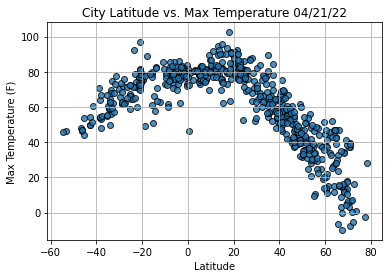

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

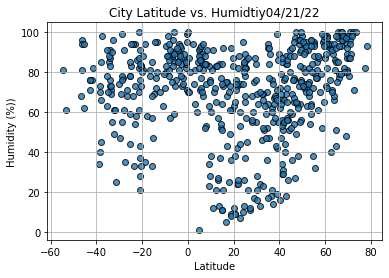

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidtiy"+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

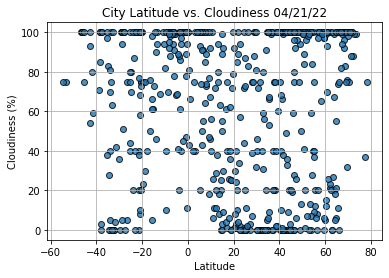

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

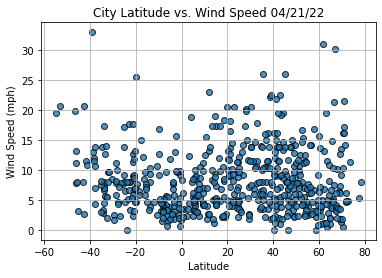

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                    Vestmanna
Country                        FO
Lat                       62.1564
Lng                       -7.1664
Max Temp                    43.72
Humidity                       76
Cloudiness                     21
Wind Speed                   1.14
Date          2022-04-21 19:56:30
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
551     True
552    False
553    False
554     True
555    False
Name: Lat, Length: 556, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,San Ignacio,BZ,17.1561,-89.0714,93.34,43,40,6.91,2022-04-21 19:56:26
3,Fortuna,US,40.5982,-124.1573,60.10,66,40,16.11,2022-04-21 19:56:27
5,Taybad,IR,34.7400,60.7756,65.10,52,5,6.51,2022-04-21 19:56:27
6,Banyo,CM,6.7500,11.8167,74.55,68,91,2.95,2022-04-21 19:56:28
7,Almora,IN,29.6167,79.6667,58.59,55,81,2.59,2022-04-21 19:56:28


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

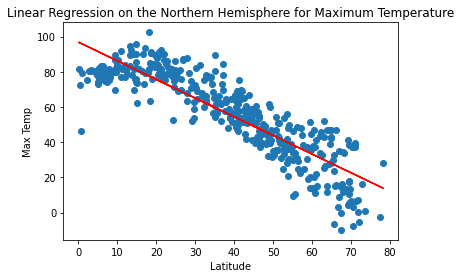

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-40))

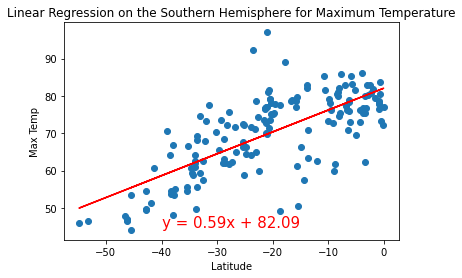

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-40,45))

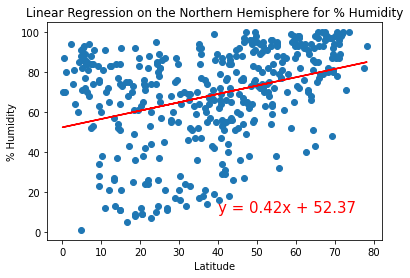

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

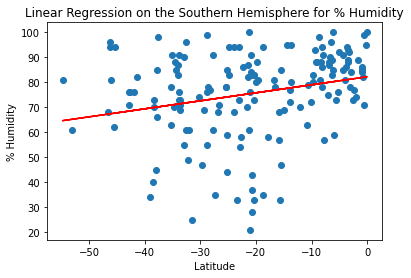

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-25,10))

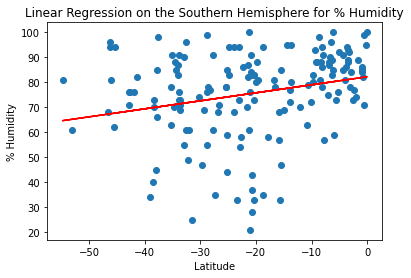

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-25,10))

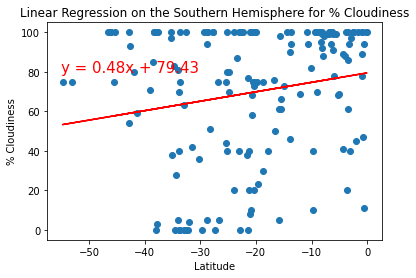

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,80))

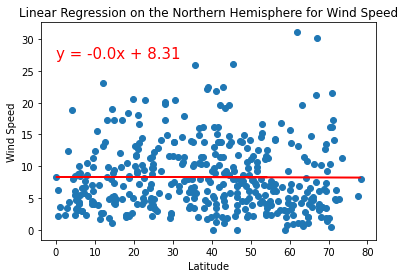

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,27))

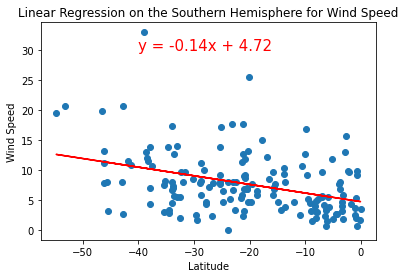

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,30))